In [1]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#This is a pipeline for text classification using the Arabic MARBERT model for news article classification from Hugging Face.
Clasification = pipeline('text-classification', model='Ammar-alhaj-ali/arabic-MARBERT-news-article-classification')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/651M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/371 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.69M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
#This is a list that contains sentences to be passed into the text classification model (Hugging Face pipeline).
sentences = ["السعودية تُسلم رسمياً ملف ترشحها لاستضافة كأس العالم لكرة القدم 2034",
            "مناظرة ترامب وهاريس مواجهة قد تحسم انتخابات أمريكا",
            "الثقافة تدشن مهرجان الورد الطائفي في نسخة جديدة في هذا الموعد",
            "أرامكو السعودية تتم صفقة استحواذها على حصة 70% في سابك من صندوق الاستثمارات العامة",
            "الصحة السعودية: توفر لقاح كوفيد المطور من جديد",
            "تقنيات الذكاء الاصطناعي تُحدث ثورةً في موسم الحج 2024",
            "افتتاح مؤتمر التقنية فنتك 2024",
             "كشف قرار صادر عن الهيئة العامة للاتصالات وتقنية المعلومات في الكويت أن تشغيل خدمات الجيل الخامس المتقدم 5G في الكويت سيكون قبل نهاية العام الحالي وتحديداً بحلول شهر ديسمبر المقبل",
             "قبل أقل من عشرة أسابيع من الانتخابات الرئاسية الأميركية، بدأ الرئيس السابق دونالد ترامب في تنويع أساليبه لجني الأموال، من طرح بطاقات رقمية للبيع تحمل 50 صورة له، إلى الأحذية وغيرها",
             "رتفعت أرباح مصرف الراجحي، الذي يعد ثاني أكبر البنوك من حيث الموجودات إلى 4405 ملايين ريال بنهاية الربع الأول 2024 وبنسبة 6%، مقارنة بـ 4145 مليون ريال تم تحقيقها خلال نفس الفترة من عام 2023",
             "تسلمت المملكة رسمياً، علم استضافة دورة الألعاب الآسيوية للصالات المغلقة والفنون القتالية السابعة، التي تستضيفها الرياض عام 2025 للمرة الأولى في تاريخها",
             "يقول فريق من علماء جامعة جونز هوبكنز إن حالات الخرف يمكن تقليصها ببساطة عن طريق إصلاح مشاكل الرؤية بالجراحة أو النظارات أو العدسات اللاصقة.",
             "تستعد أبل للكشف عن الإصدارات الجديدة من ساعاتها الذكية، ومنها الجيل العاشر من الساعة، بالإضافة إلى الإصدار الثالث من ساعة الترا، ونسخة جديدة منخفضة الثمن",
             "نبّهت منظمة الصحة العالمية، الأربعاء، إلى ارتفاع حاد عام 2023 في عدد حالات الإصابة بالكوليرا والوفيات الناجمة عنها، وشدد رئيسها على أنه مع ذلك مرض يمكن تجنّبه وتسهل معالجته",
             "اُطلقت مسابقة حفظ وتلاوة القرآن الكريم والسنة النبوية لتشجيع جميع طلاب وطالبات وتحفيزهم على حفظ كتاب الله وتلاوته، والفهم الصحيح للسنة النبوية",
             "لا اعلم",
             "آبل تعلن موعد إطلاق نظام iOS 18 الجديد",
             "لقاحات الجدري الجديد تصل الى الكونغو للتصدي للوباء",
             "تحليل للمناظرة بين دونالد ترامب وكامالا هاريس وتأثيرها على الانتخابات",
             "الانتخابات الرئاسية الفرنسية: التوقعات والتحليلات قبل التصويت",
             "اكتشاف أعمال فنية جديدة في معرض الفن الحديث",
             "دراسة عن كيفية تأثير الثقافة الشعبية على المجتمع",
             "تقرير عن أرباح الشركات الكبرى في القطاع التكنولوجي",
             "مؤتمر الصحة العالمي: مناقشة أحدث الأبحاث في علاج السرطان",
             "حوار بين الأديان: تعزيز التسامح والتفاهم بين المجتمعات المختلفة",
             "كيف يتم الحفاظ على التراث الديني في العصر الحديث",
             "الاستثمار وخسارة الاموال في التطورات التكنولوجية هل هو المستقبل أم مجرد اتجاه زائل؟",
             "هل يمكن أن يؤثر الذكاء الاصطناعي على صنع القرارات السياسية؟",
             "كيف تؤثر الابتكارات المالية والربحية على الثقافة الشعبية وماهو تأثير التكنولوجيا المالية على الفنون",
             "اسهام الابتكارات التكنولوجية في تحسين الأداء الرياضي وتطوير المعدات الرياضية",
             "اكتشاف كوكب جديد في نظام شمسي بعيد",
             "تأثير تغير المناخ على التنوع البيولوجي في الغابات الاستوائية",
             "تقرير حول زيادة عدد الشكاوى المتعلقة بخدمات الإنترنت في المناطق الريفية"
             ]

#Each sentence is passed through the classification model, and the results are saved in 'results', which is a list of dictionaries, where each dictionary contains the label and score for each sentences
results = Clasification(sentences)
print(type(results))

#Converts the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(results)
print(type(df))

#Adds the original sentences as a new column in the DataFrame, corresponding to each result.
df['sentence'] = sentences

#Sorts the DataFrame by the 'score' column in descending order.
df.sort_values(by='score', ascending=False, inplace=True)
print(df)

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
       label     score                                           sentence
20   Culture  0.999908        اكتشاف أعمال فنية جديدة في معرض الفن الحديث
9    Finance  0.999907  رتفعت أرباح مصرف الراجحي، الذي يعد ثاني أكبر ا...
2    Culture  0.999904  الثقافة تدشن مهرجان الورد الطائفي في نسخة جديد...
21   Culture  0.999898   دراسة عن كيفية تأثير الثقافة الشعبية على المجتمع
23   Medical  0.999895  مؤتمر الصحة العالمي: مناقشة أحدث الأبحاث في عل...
13   Medical  0.999894  نبّهت منظمة الصحة العالمية، الأربعاء، إلى ارتف...
3    Finance  0.999890  أرامكو السعودية تتم صفقة استحواذها على حصة 70%...
22   Finance  0.999879  تقرير عن أرباح الشركات الكبرى في القطاع التكنو...
10    Sports  0.999864  تسلمت المملكة رسمياً، علم استضافة دورة الألعاب...
14  Religion  0.999852  اُطلقت مسابقة حفظ وتلاوة القرآن الكريم والسنة ...
0     Sports  0.999851  السعودية تُسلم رسمياً ملف ترشحها لاستضافة كأس ...
25   Culture  0.999832   كيف يتم الحفاظ على التراث الديني ف

In [4]:
df.shape #To see the number of rows and columns in the DataFrame.
df.info() #To get information about the DataFrame, such as data types and non-null counts.
df.columns #To get the names of the columns (labels) that i'm working with.
Scores = df['score'] #Extracts the 'score' column from the DataFrame for further use.
max_Score = Scores.max() # Gets the maximum value in the 'score' column.
print(max_Score)
min_Score = Scores.min() # Gets the minimum value in the 'score' column.
print(min_Score)
df[df['score'] < 0.99] #Filters the DataFrame to show rows where the 'score' is less than 0.99.

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 20 to 15
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   label     33 non-null     object 
 1   score     33 non-null     float64
 2   sentence  33 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.0+ KB
0.9999082088470459
0.3702511191368103


,label,score,sentence
26,Finance,0.962953,الاستثمار وخسارة الاموال في التطورات التكنولوج...
27,Politics,0.887089,هل يمكن أن يؤثر الذكاء الاصطناعي على صنع القرا...
17,Medical,0.806041,لقاحات الجدري الجديد تصل الى الكونغو للتصدي لل...
31,Culture,0.536156,تأثير تغير المناخ على التنوع البيولوجي في الغا...
30,Politics,0.531051,اكتشاف كوكب جديد في نظام شمسي بعيد
15,Sports,0.370251,لا اعلم


In [5]:
df.to_csv('classification_results.csv', index=True)  # Saves the DataFrame to a CSV file.

In [6]:
label_counts = df['label'].value_counts() #Counts the number of sentences for each label and returns a Series with labels as indices and counts as values.
sum_label = label_counts.sum() #Sums all the counts from 'label_counts', which represents the total number of sentences.
most_frequent_label = label_counts.idxmax() #Gets the label with the highest count from 'label_counts', which is the label with the most number of sentences.
print(label_counts)
print(sum_label)
print(most_frequent_label)

label
Tech        7
Culture     6
Politics    6
Medical     5
Finance     4
Sports      3
Religion    2
Name: count, dtype: int64
33
Tech


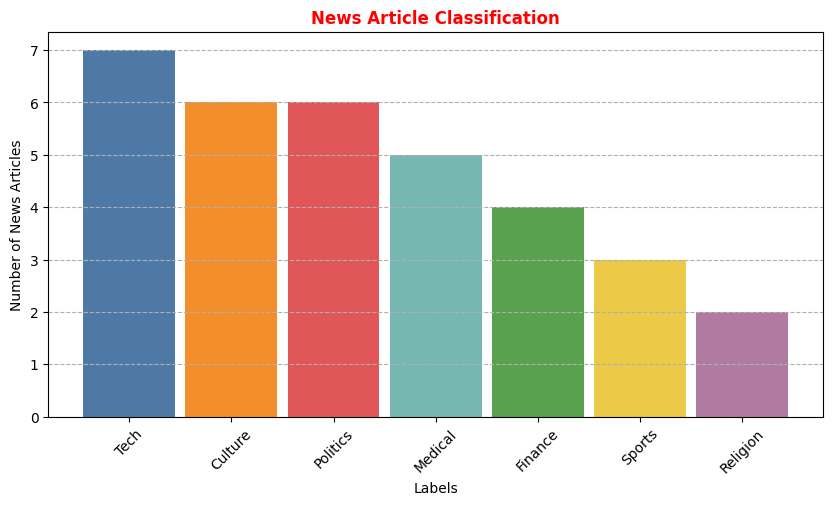

In [7]:
'''The chart visualizes the distribution of news articles across different labels as classified by the model.'''

plt.figure(figsize=(10, 5)) #Sets the width (10 inches) and height (5 inches) of the figure.

# Creates a bar chart where 'label_counts.index' (labels) is on the x-axis and 'label_counts.values' (counts) is on the y-axis.
# Uses a specified color list for the bars and sets the width of the bars to 0.9.
plt.bar(label_counts.index, label_counts.values, color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#B07AA1'],  width=0.9)

plt.title("News Article Classification", weight='bold', color="red") #Sets the title of the chart and makes it bold and red.
plt.xlabel("Labels") #Labels the x-axis as "Labels".
plt.ylabel("Number of News Articles") #Labels the y-axis as "Number of News Articles".
plt.grid(axis='y', linestyle='--') #Adds a dashed grid line on the y-axis to enhance readability.
plt.xticks(rotation=45) #Rotates x-axis labels by 45 degrees to improve visibility if they are long.
plt.show()

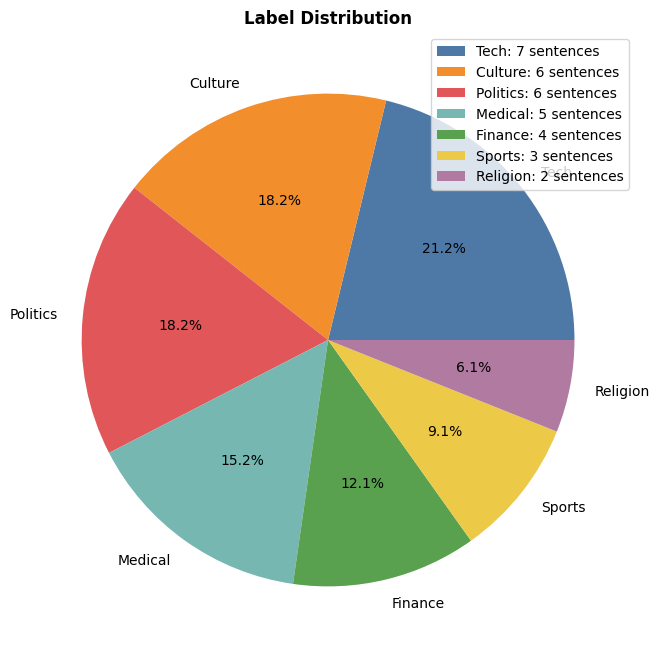

In [9]:
#This pie chart visualizes the distribution of news articles classified into various categories.
#Each slice represents the proportion of articles belonging to each category, showing how frequently each category appears in the dataset.'''

plt.figure(figsize=(10, 8)) #Sets the width (10 inches) and height (8 inches) of the pie chart.

# Creates a pie chart with each slice representing a category (label_counts.index)
# and its size representing the proportion of that category (label_counts.values).
# Displays percentages on the slices with one decimal point precision.
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', colors=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#B07AA1'])

plt.title("Label Distribution", weight='bold') #Sets the title of the chart and makes it bold.

# Creates a legend with category labels and their counts
plt.legend([f"{label}: {count} sentences" for label, count in zip(label_counts.index, label_counts.values)])

plt.show()